In [1]:
import numpy as np 
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import tensorflow as tf

In [2]:
saver = tf.train.import_meta_graph('Modelo1.ckpt.meta')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from Modelo1.ckpt


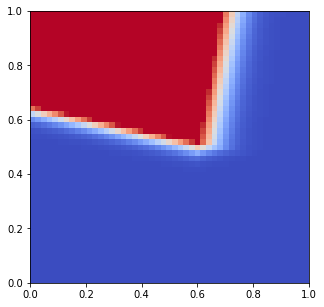

In [3]:
with tf.Session() as sess:
    
    saver.restore(sess,'Modelo1.ckpt')
    
    X = sess.graph.get_tensor_by_name('input1:0')
    output = sess.graph.get_tensor_by_name('strided_slice:0')
    
    Yp = sess.run(output, feed_dict={X:[[0.8,0.8]]})
    
    #print(Yp)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    
    resolucion = 50
    
    x = np.linspace(0.,1.,resolucion)
    y = np.linspace(0.,1.,resolucion)
    
    Y = np.zeros((resolucion,resolucion))
    
    for i,_x in enumerate(x):
        for j,_y in enumerate(y):
            Y[i,j] = sess.run(output, feed_dict={X:[[_x,_y]]})
            
    ax.pcolormesh(x,y,Y.T,cmap='coolwarm')